In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
105,21,72000,0
371,60,83000,1
334,57,60000,1
47,27,54000,0
52,29,83000,0


In [7]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1), df['Purchased'],test_size=0.2)

In [9]:

x_train.shape,x_test.shape

((320, 2), (80, 2))

#### standardScalar

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


scalar.fit(x_train)


# transform
x_train_scaled = scalar.transform(x_train)
x_test_scaled= scalar.transform(x_test)

In [11]:
scalar.mean_

array([3.6953125e+01, 6.8928125e+04])

In [12]:
x_test_scaled

array([[ 0.49374356, -0.14904244],
       [ 1.27639588,  0.5767952 ],
       [ 0.68940664,  2.1192002 ],
       [-1.56071879,  0.09290344],
       [-0.58240339, -0.0280695 ],
       [ 1.5698905 ,  0.39533579],
       [-1.26722417, -1.11682597],
       [ 0.98290126, -1.38901509],
       [ 2.15687974, -0.81439362],
       [ 1.0807328 , -1.20755568],
       [-1.26722417, -1.26804215],
       [-1.26722417,  0.45582226],
       [ 2.15687974,  0.21387638],
       [ 1.96121666,  1.6050652 ],
       [ 2.0590482 ,  2.27041638],
       [ 2.15687974,  0.5767952 ],
       [ 0.29808047, -0.27001539],
       [-0.87589801, -1.11682597],
       [ 0.20024893, -0.81439362],
       [ 0.88506972,  1.45384903],
       [-0.97372955, -0.36074509],
       [-0.58240339, -1.54023127],
       [-0.19107723, -0.90512333],
       [-0.97372955, -0.33050186],
       [ 0.00458585, -0.51196127],
       [ 0.29808047,  0.0626602 ],
       [ 0.39591202, -0.5422045 ],
       [ 0.98290126, -1.0563395 ],
       [-1.46288725,

In [13]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [14]:
x_test_scaled= pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [15]:
x_train_scaled
x_test_scaled

,Age,EstimatedSalary
0,0.493744,-0.149042
1,1.276396,0.576795
2,0.689407,2.119200
3,-1.560719,0.092903
4,-0.582403,-0.028070
...,...,...
75,0.982901,-1.177312
76,-1.267224,-1.389015
77,1.080733,1.967984
78,-0.680235,-1.570475


In [16]:
x_train.describe()

,Age,EstimatedSalary
count,320.000000,320.000000
mean,36.953125,68928.125000
std,10.237661,33117.031336
min,18.000000,15000.000000
25%,29.000000,44000.000000
50%,36.000000,68500.000000
75%,43.250000,86000.000000
max,60.000000,150000.000000


In [17]:
np.round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,320.00,320.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.85,-1.63
25%,-0.78,-0.75
50%,-0.09,-0.01
75%,0.62,0.52
max,2.25,2.45


#### effect of scalling

Text(0.5, 1.0, 'after title ')

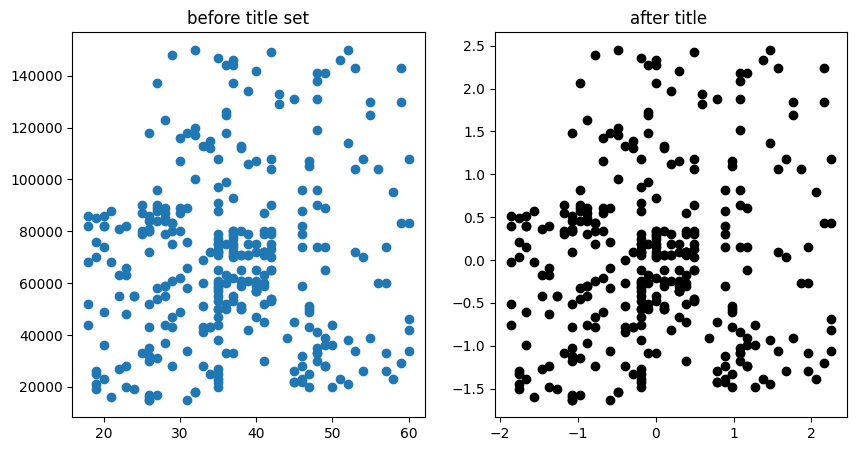

In [18]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(10,5)) 
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("before title set")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='black')
ax2.set_title("after title ")

Text(0.5, 1.0, 'after kde plot')

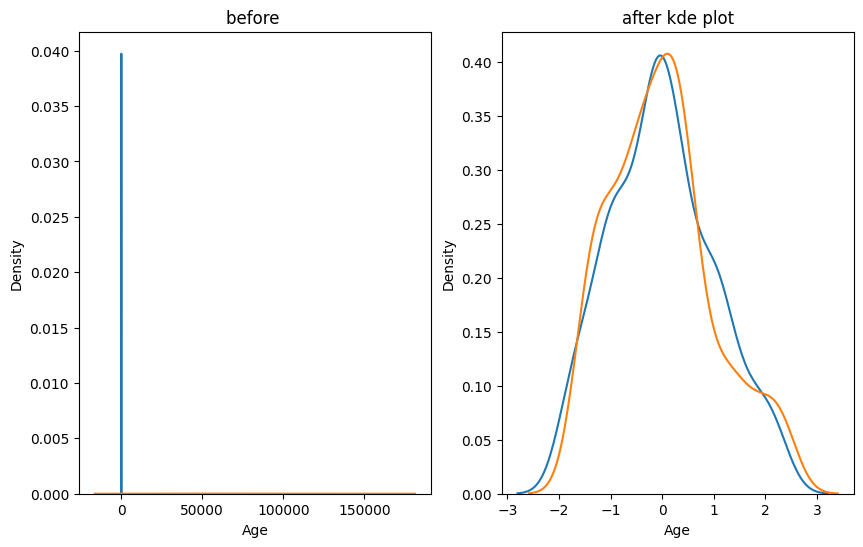

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,6))
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
ax1.set_title("before ")

sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("after kde plot")

#### why scaling is important

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
lr= LogisticRegression()
lr_transform = LogisticRegression()

In [22]:
lr.fit(x_train,y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
lr_transform.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
y_pred = lr.predict(x_test)
Y_pred_scaled= lr.predict(x_test_scaled)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
print("accuracy of x_train is " ,accuracy_score(y_test,y_pred))

accuracy of x_train is  0.8375


In [53]:
print("accuracy_score of x_trasform",accuracy_score(y_test,Y_pred_scaled))

accuracy_score of x_trasform 0.5375


In [55]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
Dt= DecisionTreeClassifier()
df_transform = DecisionTreeClassifier()

In [64]:
Dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
y_train

294    0
274    1
37     0
13     0
384    1
      ..
175    0
180    0
362    1
141    0
282    1
Name: Purchased, Length: 320, dtype: int64

In [66]:
df_transform.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
y_pred= Dt.predict(x_test)
Y_pred_scaled=df_transform.predict(x_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,Y_pred_scaled))

actual 0.825
scaled 0.8125
